<h2><center>IBM Employee Attrition ML Project</center></h2>
<h3><center>Exploratory Data Analysis</center></h3>
<h4><center>Author: Akshay Pandurang Paunikar</center></h4>

#### Problem Statement:
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read the dataset
data = pd.read_csv('dataset/IBMEmployeeAttritioin.csv')

# display first five records
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# check dimensions of the data
data.shape

(1470, 35)

In [4]:
# check datatypes present
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
# descriptive statistics
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.49,403.51,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.19,8.11,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.91,1.02,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.87,602.02,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.72,1.09,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.89,20.33,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.73,0.71,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.06,1.11,1.0,1.00,2.0,3.00,5.0


In [6]:
# concise summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# check for null/missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# check for duplicate records
data.duplicated().sum()

0

In [9]:
# function to get numerical / categorical columns
num_cols = []
cat_cols = []
def num_cat_cols(data):
    for i in data.columns:
        if data[i].dtypes != 'O':
            num_cols.append(i)
        else:
            cat_cols.append(i)

In [10]:
num_cat_cols(data)

In [11]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [12]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [13]:
len(num_cols), len(cat_cols)

(26, 9)

In [14]:
# unique values in category columns
for i in cat_cols:
    print(i, "-->>", data[i].unique())

Attrition -->> ['Yes' 'No']
BusinessTravel -->> ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department -->> ['Sales' 'Research & Development' 'Human Resources']
EducationField -->> ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender -->> ['Female' 'Male']
JobRole -->> ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus -->> ['Single' 'Married' 'Divorced']
Over18 -->> ['Y']
OverTime -->> ['Yes' 'No']


As you can see that the column "Over18" has only one value "Y" throughout the data. So we will drop this column as it is of no use. Also the column "EmployeeCount" has only one value "1" and "StandardHours" has value 80 so we will drop it too. Also "EmployeeNumber" is just the number given and is of no use.

In [15]:
data = data.drop(['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1)
data.shape

(1470, 31)

#### Initial Data Insights:
 - The dataset has 1470 records and 35 features.
 - No missing/null/duplicate records in data.
 - There are total of 26 numerical features and 9 categorical features present.
 - Our Target Feature is "Attrition".

### Explorarory Data Analysis (EDA):

In [16]:
# Attrition column
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [17]:
# BusinessTravel
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [18]:
# Department
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Let's visualize above information using Pie Charts.

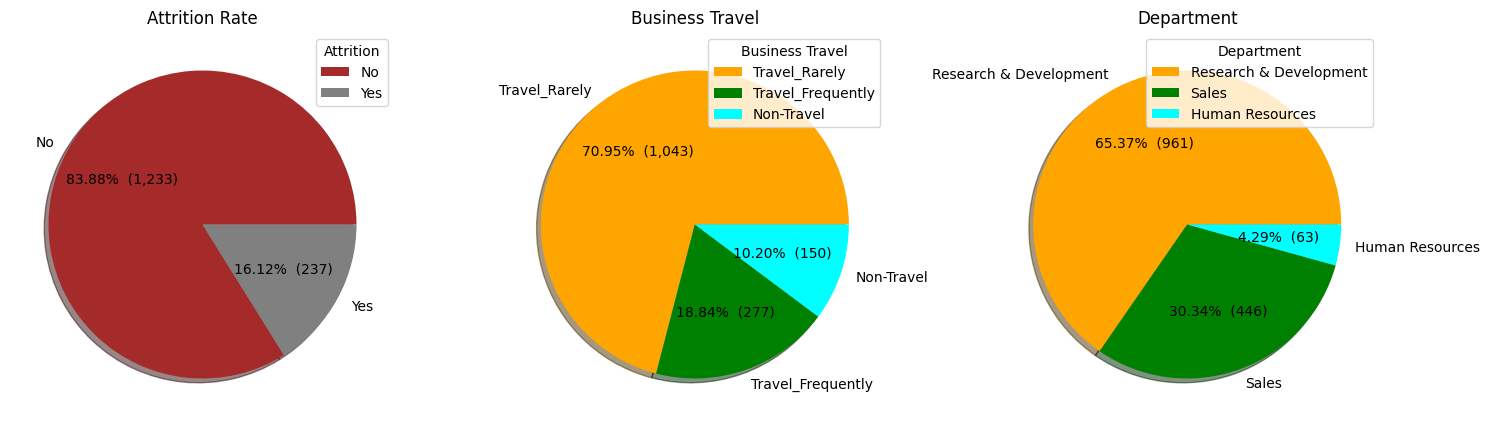

In [19]:
fig = plt.figure(figsize=(18,5))

# Attrition

ax1 = plt.subplot2grid((1,3), (0,0))

dataAttrition = data['Attrition'].value_counts().values
labelsAttrition = data['Attrition'].value_counts().index

plt.pie(x=dataAttrition, labels=labelsAttrition,
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(dataAttrition)/100), colors=['brown','gray'], shadow=True)
plt.legend(labelsAttrition, loc='upper right', title='Attrition')
plt.title("Attrition Rate")

# BusinessTravel

ax2 = plt.subplot2grid((1,3), (0,1))

dataBusinessTravel = data['BusinessTravel'].value_counts().values
labelsBusinessTravel = data['BusinessTravel'].value_counts().index

plt.pie(x=dataBusinessTravel, labels=labelsBusinessTravel,
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(dataBusinessTravel)/100), colors=['orange','green', 'cyan'], shadow=True)
plt.legend(labelsBusinessTravel, loc='upper right', title='Business Travel')
plt.title("Business Travel")

# Department

ax3 = plt.subplot2grid((1,3), (0,2))

dataDepartment = data['Department'].value_counts().values
labelsDepartment = data['Department'].value_counts().index

plt.pie(x=dataDepartment, labels=labelsDepartment,
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(dataDepartment)/100), colors=['orange','green', 'cyan'], shadow=True)
plt.legend(labelsDepartment, loc='upper right', title='Department')
plt.title('Department')

# plt.tight_layout()
plt.show()

#### Insights:
 - 237 (16.12%) employees left the organization as compared to 1233 (83.88%) employees who stayed and data is imbalanced w.r.t. Attrition.
 - 1043 (70.95%) employees travel rarely, 277 (18.84%) employees travel frequently according to business needs and 150 (10.20%) employees do not travel at all.
 - 961 (65.37%) employees are from Research & Development, 446 (30.34%) employees are from Sales, 63 (4.29%) employees are from Human Resource.

In [20]:
# Gender
data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [21]:
# MaritalStatus
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [22]:
# OverTime
data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

Let's visualize above data using pie charts.

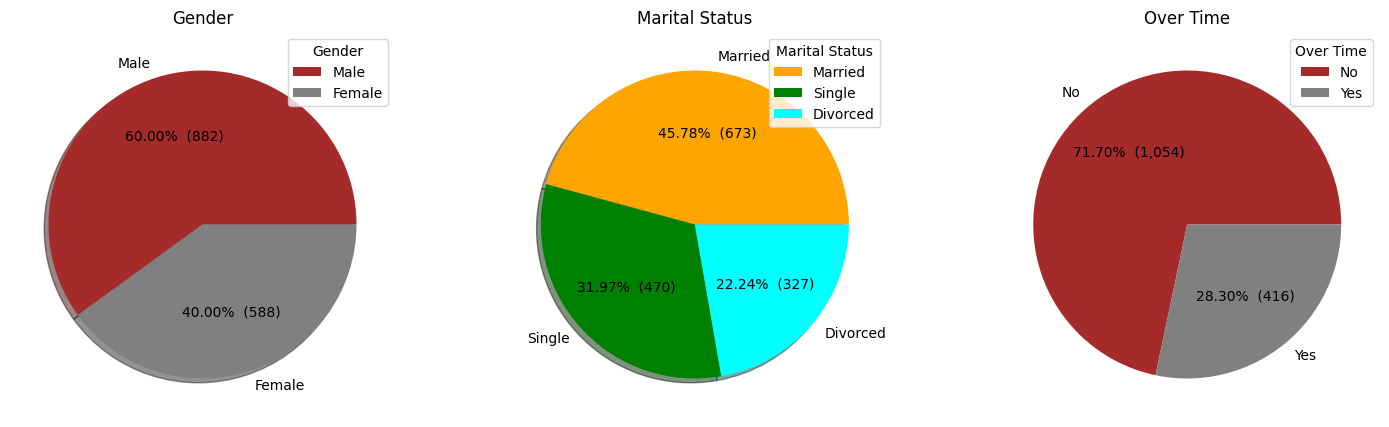

In [23]:
fig = plt.figure(figsize=(18,5))

# Gender

ax1 = plt.subplot2grid((1,3), (0,0))

dataGender = data['Gender'].value_counts().values
labelsGender = data['Gender'].value_counts().index

plt.pie(x=dataGender, labels=labelsGender,
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(dataGender)/100), colors=['brown','gray'], shadow=True)
plt.legend(labelsGender, loc='upper right', title='Gender')
plt.title("Gender")

# MaritalStatus

ax2 = plt.subplot2grid((1,3), (0,1))

dataMaritalStatus = data['MaritalStatus'].value_counts().values
labelsMaritalStatus = data['MaritalStatus'].value_counts().index

plt.pie(x=dataMaritalStatus, labels=labelsMaritalStatus,
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(dataGender)/100), colors=['orange','green', 'cyan'], shadow=True)
plt.legend(labelsMaritalStatus, loc='upper right', title='Marital Status')
plt.title("Marital Status")

# OverTime

ax3 = plt.subplot2grid((1,3), (0,2))

dataOvertime = data['OverTime'].value_counts().values
labelsOvertime = data['OverTime'].value_counts().index

plt.pie(x=dataOvertime, labels=labelsOvertime,
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(dataOvertime)/100), colors=['brown','gray'])
plt.legend(labelsOvertime, loc='upper right', title='Over Time')
plt.title("Over Time")

# plt.tight_layout()
plt.show()

#### Insights:
 - There are 882 (60%) Males and 588 (40%) Female employees in the dataset.
 - 673 (45.78%) employees are Married, 470 (31.97%) employees are Single and 327 (22.24%) employees are Divorced.
 - 416 (28.30%) employees are doing Over Time and 1054 (71.70%) employees are not doing any Over Time.

In [24]:
# EducationField
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [25]:
# JobRole
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Let's visualize above data using countplots

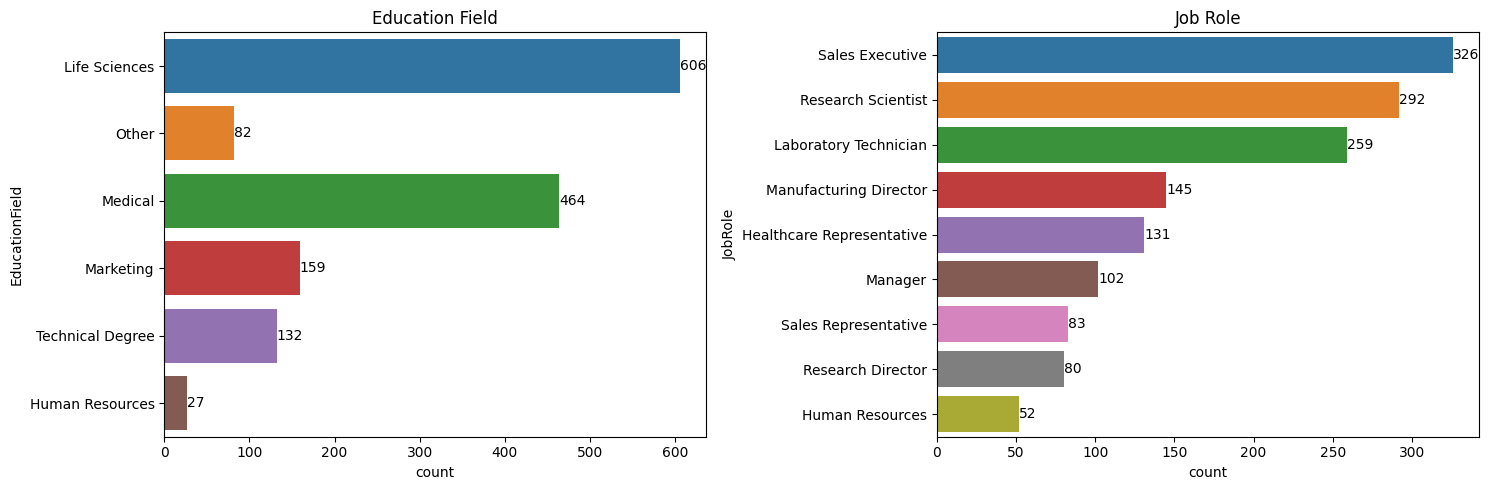

In [26]:
fig = plt.figure(figsize=(15,5))

# EducationField
ax1 = plt.subplot2grid((1,2), (0,0))

sns.countplot(y='EducationField', data=data, orient='h')
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("Education Field")

# JobRole
ax2 = plt.subplot2grid((1,2), (0,1))

sns.countplot(y='JobRole', data=data, orient='h')
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("Job Role")

plt.tight_layout()
plt.show()

#### Insights:
 - About 606 employees have education background as Life Sciences, followed by Medical - 464 and Marketing - 159.
 - About 326 employees have Job Role as Sales Executive, Research Scientist - 292, Laboratory Technician - 259 and so on.

#### Age, DistanceFromHome & MonthlyIncome

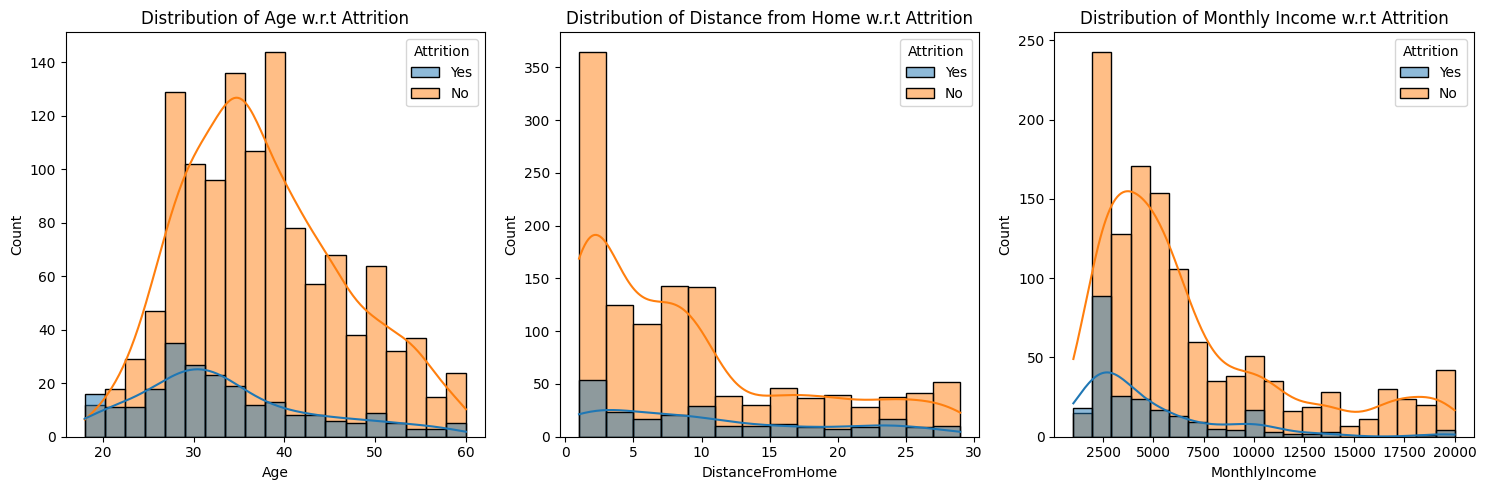

In [27]:
fig = plt.figure(figsize=(15,5))

# Age

ax1 = plt.subplot2grid((1,3),(0,0))
sns.histplot(data=data, x='Age', hue='Attrition',kde=True)
# for i in ax1.containers:
#     ax1.bar_label(i)
plt.title("Distribution of Age w.r.t Attrition")

# DistanceFromHome

ax2 = plt.subplot2grid((1,3),(0,1))
sns.histplot(data=data, x='DistanceFromHome', hue='Attrition',kde=True)
# for i in ax2.containers:
#     ax2.bar_label(i)
plt.title("Distribution of Distance from Home w.r.t Attrition")

# MonthlyIncome

ax3 = plt.subplot2grid((1,3),(0,2))
sns.histplot(data=data, x='MonthlyIncome', hue='Attrition', kde=True)
# for i in ax3.containers:
#     ax3.bar_label(i)
plt.title("Distribution of Monthly Income w.r.t Attrition")    

plt.tight_layout()
plt.show()

#### Insights:
 - Most of the employees are from age group 28 to 40. Maximum Attrition is observed in the age group 28 to 34.
 - Most of the employees live within 10 kms from office. Maximum Attrition is observed in employees living within 3 kms.
 - Most of the employees have Monthly Income in the range 2500 to 7500. Maximum attrition is observed in employees with Monthly Income 2500.

#### DailyRate, HourlyRate, MonthlyRate

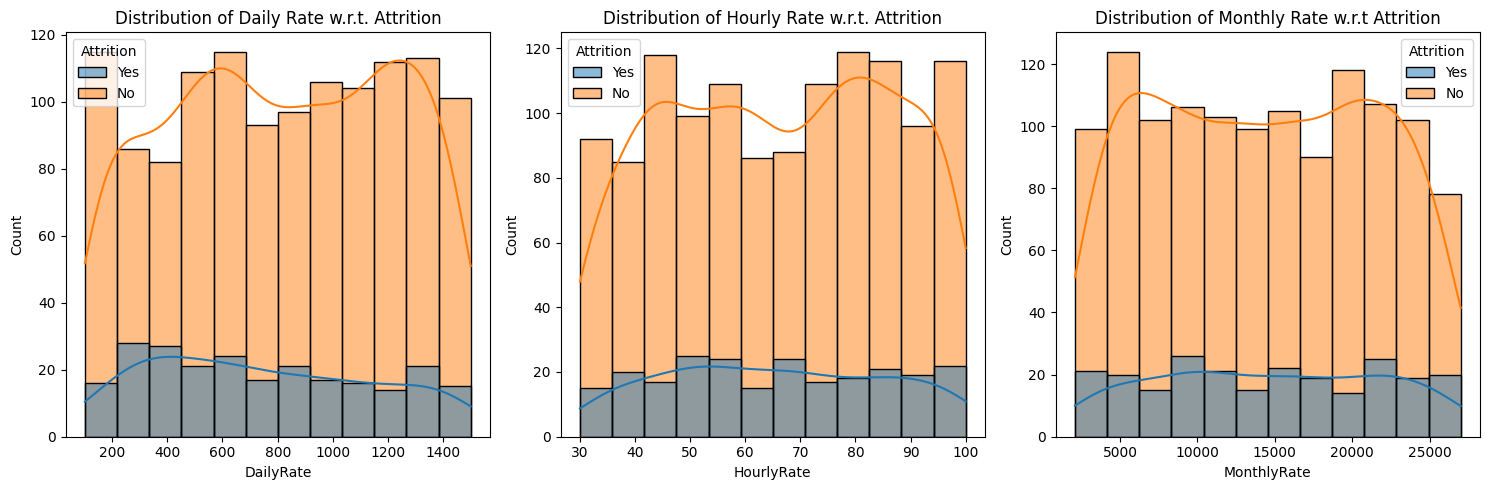

In [28]:
fig = plt.figure(figsize=(15,5))

# DailyRate

ax1 = plt.subplot2grid((1,3),(0,0))
sns.histplot(data=data, x='DailyRate', hue='Attrition', kde=True)
# for i in ax1.containers:
#     ax1.bar_label(i)
plt.title('Distribution of Daily Rate w.r.t. Attrition')

# HourlyRate

ax2 = plt.subplot2grid((1,3),(0,1))
sns.histplot(data=data, x='HourlyRate', hue='Attrition', kde=True)
# for i in ax2.containers:
#     ax2.bar_label(i)
plt.title("Distribution of Hourly Rate w.r.t. Attrition")

# MonthlyRate
ax3 = plt.subplot2grid((1,3),(0,2))
sns.histplot(data=data, x='MonthlyRate', hue='Attrition', kde=True)
# for i in ax3.containers:
#     ax3.bar_label(i)
plt.title("Distribution of Monthly Rate w.r.t Attrition")

plt.tight_layout()
plt.show()

##### As you can see that there no big differnce in employee count and Attrition w.r.t Daily Rate, Hourly Rate and Monthly Rate.